# Naive Bayes Classification diabetes

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
#Read the data
df = pd.read_csv("diabetes.csv")
# showing the first 5 lines of the data!
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#check for null values
pd.isnull(df).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0    500
1    268
Name: Outcome, dtype: int64

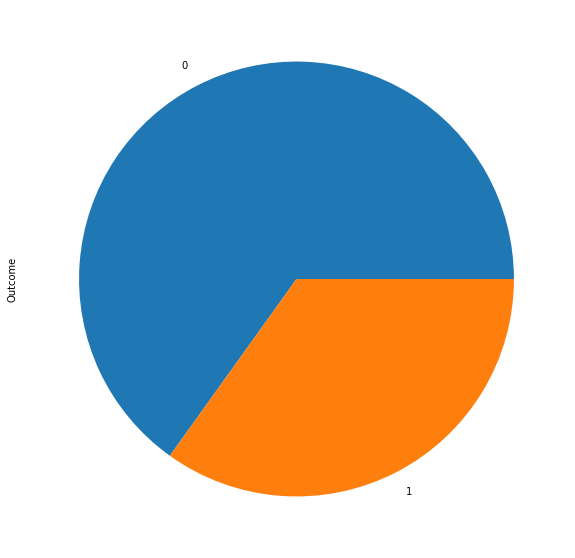

In [7]:
df["Outcome"].value_counts().plot(kind="pie",figsize=(10,10))
df["Outcome"].value_counts()

<AxesSubplot:>

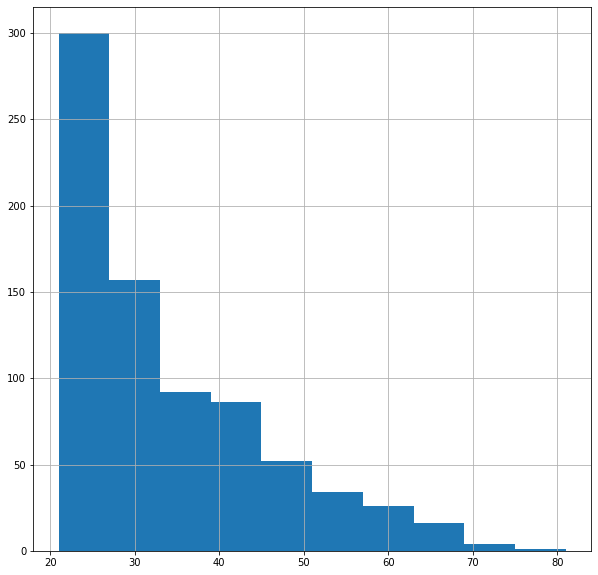

In [8]:
df["Age"].hist(label=" Age", figsize=(10,10))

<AxesSubplot:>

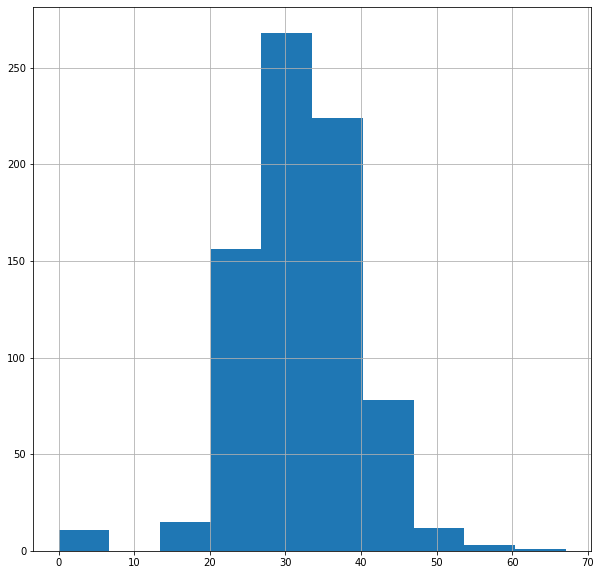

In [9]:
df["BMI"].hist(label=" BMI", figsize=(10,10))

<AxesSubplot:>

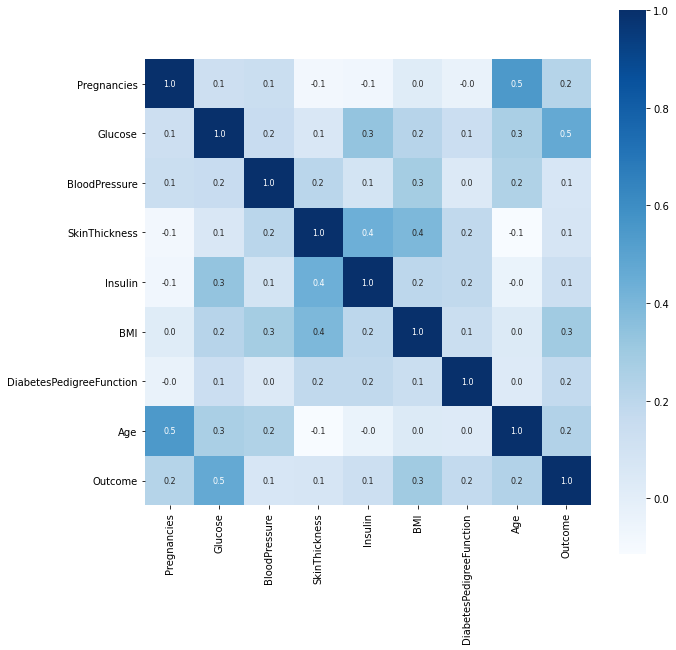

In [10]:
correlation = df.corr()
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
X = df.drop(['Outcome'], axis=1)# features 
Y = df['Outcome'] # target 
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.15, random_state=0)
# Training dataset
print(X_train.shape)
print(y_train.shape)
# Testing dataset
print(X_test.shape)
print(y_test.shape)

(652, 8)
(652,)
(116, 8)
(116,)


## naive_bayes

In [13]:
model = MultinomialNB()
model.fit(X_train, y_train) # start train
# predicted output by model 
y_pred = model.predict(X_test)
# predicted = y_pred
# actual = y_test 

cm = confusion_matrix(y_pred, y_test)
print(cm)

[[55 20]
 [23 18]]


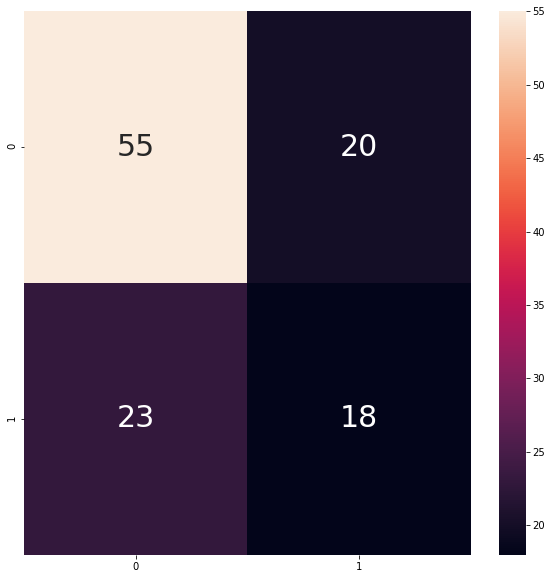

In [14]:
plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(cm, annot = True, annot_kws = {'size':30})

sns.set_style({'xtick.bottom': True})

In [15]:
# Creating a function to report confusion metricsdef confusion_metrics (conf_matrix):# save confusion matrix and slice into four pieces   
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]   
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))    
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))  
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')


True Positives: 18
True Negatives: 55
False Positives: 20
False Negatives: 23
--------------------------------------------------
Accuracy: 0.63
Mis-Classification: 0.37
Sensitivity: 0.44
Specificity: 0.73
Precision: 0.73
f_1 Score: 0.55


## LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train) # start train
# predicted output by model 
y_pred = model.predict(X_test)
# predicted = y_pred
# actual = y_test 

cm = confusion_matrix(y_pred, y_test)
print(cm)

[[70 15]
 [ 8 23]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


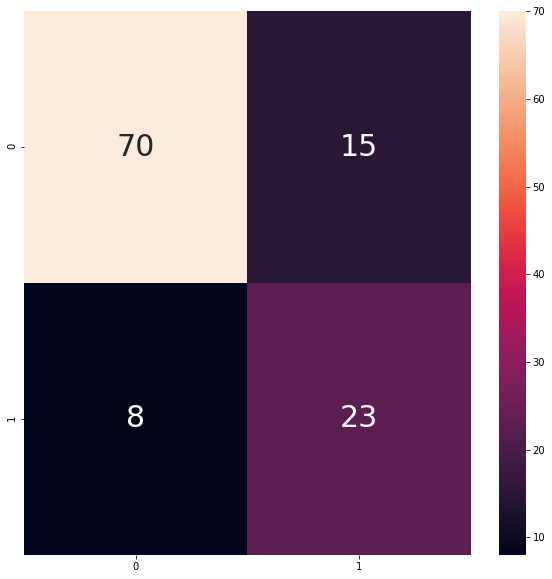

In [17]:
plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(cm, annot = True, annot_kws = {'size':30})

sns.set_style({'xtick.bottom': True})

In [18]:
# Creating a function to report confusion metricsdef confusion_metrics (conf_matrix):# save confusion matrix and slice into four pieces   
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]   
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))    
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))    # calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))  
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')


True Positives: 23
True Negatives: 70
False Positives: 15
False Negatives: 8
--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.74
Specificity: 0.82
Precision: 0.82
f_1 Score: 0.78


## <a id='conclusions'></a>
## Conclusions:

###### LogisticRegression is the better model for this data.